# Lab3 Linear regression using robust functions

### Libraries

In [80]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib
import math
%matplotlib inline

### Helper functions

In [81]:
def grad_descent(x0, ak, fct, grad_fct, max_iter = 1e4, threshold = 1e-4):
    iter_ = 0
    xk = x0
    x_iter = list()
    x_iter.append(xk)
    while iter_ <= max_iter:
        fct_current = fct(xk)
        xk = xk - ak * grad_fct(xk)
        fct_next = fct(xk)
        x_iter.append(xk)
        if abs(fct_next - fct_current) < threshold and fct_next < fct_current:
            print("The algorithm has converged after", iter_ + 1, "iterations!!!")
            break
        iter_ += 1
        if iter_ == max_iter:
            print("The algorithm has NOT converged after", max_iter, "iterations!!!")
    return(np.asarray(x_iter))

def grad_descent_perp(x0, ak, fct, grad_fct, max_iter = 1e4, threshold = 1e-4):
    iter_ = 0
    xk = x0/np.linalg.norm(x0)
    x_iter = list()
    x_iter.append(xk)
    while iter_ <= max_iter:
        xk = xk/np.linalg.norm(xk)
        fct_current = fct(xk)
        xk = xk - ak * grad_fct(xk)
        ak = ak*0.999
        fct_next = fct(xk)
        xk = xk/np.linalg.norm(xk)
        x_iter.append(xk)
        if abs(fct_next - fct_current) < threshold and fct_next < fct_current:
            print("The algorithm has converged after", iter_ + 1, "iterations!!!")
            break
        iter_ += 1
        if iter_ == max_iter:
            print("The algorithm has NOT converged after", max_iter, "iterations!!!")
    return(np.asarray(x_iter))

In [82]:
def compute_grad_update(xk,ak,fct,grad_fct, compute_current = True):
    next_step = xk - ak * grad_fct(xk)    
    fct_next = fct(next_step)
    if compute_current:
        fct_current = fct(xk)
        return(next_step, fct_next, fct_current)
    return(next_step, fct_next)

def grad_backtracking(x0, fct, grad_fct, max_iter = 1e4, tol_fct = 1e-4, tol_a = 1e-10):
    iter_ = 0
    xk = x0
            
    x_iter = list()
    x_iter.append(xk)
    
    while iter_ < max_iter:        
        ## set a^k = 1 at each iteration
        ak = 0.1
        ## compute x^{k+1}, f(x^{k+1}), f(x^k)
        next_step, fct_next, fct_current = compute_grad_update(xk, ak, fct, grad_fct) 
        ## Check if function value becomes smaller in next step
        if fct_next < fct_current:
            #print("if")
            ## If so, update x^{k+1}
            x_iter.append(next_step)
            xk = next_step
        else:
            #print("else")
            ## If function does not become smaller
            ## Check if minimum has been reached
            diff = abs(fct_next - fct_current)
            #print("fct_next:", fct_next)
            #print("fct_current:", fct_current)
            if diff < tol_fct:
                ## If so, break out of while loop and terminate
                print("The algorithm has converged at", xk , "after", iter_ + 1, "iterations!")
                break    
            else:
                #print("2nd else")
                ## If minimum has not been reached
                ## Run inner loop, as long as function value is not getting smaller
                while fct_next >= fct_current:
                    ## Half step size
                    #print("half step")
                    ak = ak/2
                    next_step, fct_next = compute_grad_update(xk,ak,fct,grad_fct,False)
                    ## Check if tolerances are reached
                    diff = abs(fct_next - fct_current)
                    if diff < tol_fct or ak < tol_a:
                        ## If so, break out of inner loop
                        break
                if diff < tol_fct or ak < tol_a:
                    ## If tolerances are reached also break out of outer loop
                    print("The algorithm has converged at", xk , "after", iter_ + 1, "iterations!")
                    break
                #update x^{k+1}
                x_iter.append(next_step)
                xk = next_step

        iter_ += 1
        if iter_ == max_iter:
            print("Algorithm has NOT converged after", max_iter,"iterations!!")
    return(np.asarray(x_iter))




def grad_backtracking_perp(x0, fct, grad_fct, max_iter = 1e4, tol_fct = 1e-4, tol_a = 1e-10):
    iter_ = 0
    xk = x0/np.linalg.norm(x0)
            
    x_iter = list()
    x_iter.append(xk)
    
    while iter_ < max_iter:        
        ## set a^k = 1 at each iteration
        ak = 0.1
        ## compute x^{k+1}, f(x^{k+1}), f(x^k)
        next_step, fct_next, fct_current = compute_grad_update(xk, ak, fct, grad_fct) 
        ## Check if function value becomes smaller in next step
        if fct_next < fct_current:
            #print("if")
            ## If so, update x^{k+1}
            x_iter.append(next_step)
            xk = next_step
            xk = xk/np.linalg.norm(xk)
        else:
            #print("else")
            ## If function does not become smaller
            ## Check if minimum has been reached
            diff = abs(fct_next - fct_current)
            #print("fct_next:", fct_next)
            #print("fct_current:", fct_current)
            if diff < tol_fct:
                ## If so, break out of while loop and terminate
                print("The algorithm has converged at", xk , "after", iter_ + 1, "iterations!")
                break    
            else:
                #print("2nd else")
                ## If minimum has not been reached
                ## Run inner loop, as long as function value is not getting smaller
                while fct_next >= fct_current:
                    ## Half step size
                    #print("half step")
                    ak = ak/2
                    next_step, fct_next = compute_grad_update(xk,ak,fct,grad_fct,False)
                    ## Check if tolerances are reached
                    diff = abs(fct_next - fct_current)
                    if diff < tol_fct or ak < tol_a:
                        ## If so, break out of inner loop
                        break
                if diff < tol_fct or ak < tol_a:
                    ## If tolerances are reached also break out of outer loop
                    print("The algorithm has converged at", xk , "after", iter_ + 1, "iterations!")
                    break
                #update x^{k+1}
                x_iter.append(next_step)
                xk = next_step
                xk = xk/np.linalg.norm(xk)

        iter_ += 1
        if iter_ == max_iter:
            print("Algorithm has NOT converged after", max_iter,"iterations!!")
    return(np.asarray(x_iter))

In [83]:
def Q(w):
    e = w[0]*x + w[1] - y
    return(0.5*e.dot(e))

def Q_perp(w):
    X = np.c_[x,y].T.copy()
    b = w[2].copy()
    w01 = np.r_[w[0],w[1]].copy()
    e = w01.dot(X) + b
    return(0.5*e.dot(e))

def grad_Q(w):
    grad1 = (w[0]*x + w[1] - y).dot(x)
    grad2 = (w[0]*x + w[1] - y).dot(np.ones(x.shape[0]))
    return(np.r_[grad1, grad2])

def grad_Q_perp(w):
    grad1 = (w[0]*x + w[1]*y + w[2]).dot(x)
    grad2 = (w[0]*x + w[1]*y + w[2]).dot(y)
    grad3 = (w[0]*x + w[1]*y + w[2]).dot(np.ones(x.shape[0]))
    return(np.r_[grad1, grad2, grad3])

def Q_cauchy(w):
    e_vec = [cauchy(w[0]*x[i] + w[1] - y[i]) for i in range(len(x))]
    return(np.sum(e_vec))

def Q_cauchy_perp(w):
    e_vec = [0.5*math.log(1 + (w[0]*x[i] + w[1]*y[i] + w[2])**2) for i in range(len(x))]
    return(np.sum(e_vec))

def grad_Q_cauchy(w):
    dQ_dw0 = np.sum([(w[0]*x[i] + w[1] - y[i])/(1 + (w[0]*x[i] + w[1] - y[i])**2)*x[i] for i in range(len(x))])
    dQ_dw1 = np.sum([(w[0]*x[i] + w[1] - y[i])/(1 + (w[0]*x[i] + w[1] - y[i])**2)  for i in range(len(x))])
    return(np.r_[dQ_dw0, dQ_dw1])

def grad_Q_cauchy_perp(w):
    dQ_dw0 = [(w[0]*x[i] + w[1]*y[i] + w[2])/(1 + (w[0]*x[i] + w[1]*y[i] + w[2])**2) * x[i] for i in range(len(x))]
    dQ_dw1 = [(w[0]*x[i] + w[1]*y[i] + w[2])/(1 + (w[0]*x[i] + w[1]*y[i] + w[2])**2) * y[i] for i in range(len(x))]
    dQ_dw2 = [(w[0]*x[i] + w[1]*y[i] + w[2])/(1 + (w[0]*x[i] + w[1]*y[i] + w[2])**2) for i in range(len(x))]
    return(np.r_[np.sum(dQ_dw0), np.sum(dQ_dw1), np.sum(dQ_dw2)])

In [84]:
def generate_xy(angle_):
    m = [0.,0.]
    angle = angle_*math.pi/180
    rot = np.array([[math.cos(angle), -math.sin(angle)], [math.sin(angle), math.cos(angle)]])
    lamb = np.array([[100,0],[0,1]])
    s = np.matmul(rot, np.matmul(lamb, rot.transpose()))
    x, y = np.random.multivariate_normal(m,s,100).T
    return(x, y)

## Toy experiment

### Implementation of gradient descent for the vertical and perpendicular methods for the toy problem

In this section I will implement the vertical and the perpendicular methods using gradient descent with a small constan value of $\alpha$ ($=10^{-4}$ and $=10^{-5}$, respectively). I have tried to implement the backtracking algorithm, but for some reason the perpendicular method did not converge properly for some of the angles, although I normalize the iterates to have norm equal 1. The reason for this normalization is that the parameters $w_0$, $w_1$, $b$ all tend to zero, because the loss function has its minimum at this point.

In [89]:
w = np.array([0.5,0.5])
w_perp = np.array([0,1,0])

In [90]:
x, y = generate_xy(0)
x0, y0 = x, y
print("Vertical offsets at 0 degrees:")
w0 = grad_descent(w, 1e-5, Q, grad_Q)
#w0 = grad_backtracking(w, Q, grad_Q, tol_fct = 1e-6)
weights0 = w0[-1,:]
print("Weights at 0 degrees for vertical offsets:", weights0)

print("\nPerpendicular offsets at 0 degrees:")
w0_perp = grad_descent_perp(w_perp, 1e-5, Q_perp, grad_Q_perp, 1e4, 1e-4)
#w0_perp = grad_backtracking_perp(w_perp, Q_perp, grad_Q_perp, tol_fct = 1e-4)
weights0_perp = w0_perp[-1,:]
print("Weights at 0 degrees for perpendicular offsets:", weights0_perp)

Vertical offsets at 0 degrees:
The algorithm has converged after 2916 iterations!!!
Weights at 0 degrees for vertical offsets: [-0.0128375  -0.04286022]

Perpendicular offsets at 0 degrees:
The algorithm has converged after 6638 iterations!!!
Weights at 0 degrees for perpendicular offsets: [0.01260392 0.99748252 0.06978365]


In [91]:
w = np.array([1,0])
w_perp = np.array([-1,0.5,0])

In [92]:
x, y = generate_xy(45)
x45, y45 = x, y
print("\nVertical offsets at 45 degrees:")
w45 = grad_descent(w, 1e-4, Q, grad_Q)
#w45 = grad_backtracking(w, Q, grad_Q)
weights45 = w45[-1,:]
print("Weights at 45 degrees for vertical offsets:", weights45)

print("\nPerpendicular offsets at 45 degrees:")
w45_perp = grad_descent_perp(w_perp, 1e-5, Q_perp, grad_Q_perp, 1e4, 1e-4)
#w45_perp = grad_backtracking_perp(w_perp, Q_perp, grad_Q_perp)
weights45_perp = w45_perp[-1,:]
print("Weights at 45 degrees for perpendicular offsets:", weights45_perp)


Vertical offsets at 45 degrees:
The algorithm has converged after 182 iterations!!!
Weights at 45 degrees for vertical offsets: [ 0.95047415 -0.05088515]

Perpendicular offsets at 45 degrees:
The algorithm has converged after 6889 iterations!!!
Weights at 45 degrees for perpendicular offsets: [-0.69543027  0.71784261  0.03284418]


In [93]:
w = np.array([1,0])
w_perp = np.array([0.7,0.01,-0.3])

In [94]:
x, y = generate_xy(90)
x90, y90 = x, y
print("\nVertical offsets at 90 degrees:")
w90 = grad_descent(w, 1e-4, Q, grad_Q)
#w90 = grad_backtracking(w, Q, grad_Q)
weights90 = w90[-1,:]
print("Weights at 90 degrees for vertical offsets:", weights90)

print("\nPerpendicular offsets at 90 degrees:")
w90_perp = grad_descent_perp(w_perp, 1e-5, Q_perp, grad_Q_perp, 1e4, 1e-4)
#w90_perp = grad_backtracking_perp(w_perp, Q_perp, grad_Q_perp)
weights90_perp = w90_perp[-1,:]
print("Weights at 90 degrees for perpendicular offsets:", weights90_perp)


Vertical offsets at 90 degrees:
The algorithm has converged after 358 iterations!!!
Weights at 90 degrees for vertical offsets: [ 0.5094064  -0.40913039]

Perpendicular offsets at 90 degrees:
The algorithm has converged after 6340 iterations!!!
Weights at 90 degrees for perpendicular offsets: [ 0.85524122 -0.0038797  -0.5182156 ]


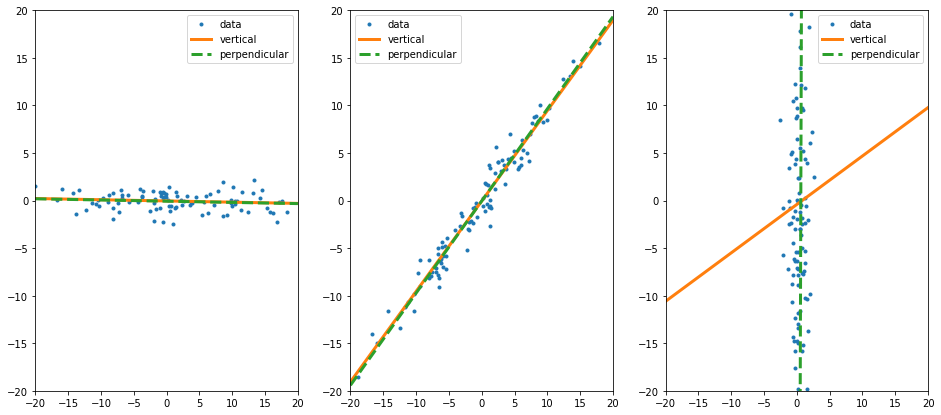

In [107]:
x_lin = np.linspace(-20, 20, 101)
x_low, x_high, y_low, y_high = -20, 20, -20, 20
y_lin = lambda x, w: w[0]*x + w[1]
y_lin_perp = lambda x, w: - w[0]/w[1]*x - w[2]/w[1]

plt.figure(figsize = (16,7))
plt.subplot(131)
plt.plot(x0, y0, ".", label = "data")
plt.plot(x_lin, y_lin(x_lin, weights0), linewidth = 3, label = "vertical")
plt.plot(x_lin, y_lin_perp(x_lin, weights0_perp), linestyle = "--", linewidth = 3, label = "perpendicular")
plt.xlim(x_low, x_high)
plt.ylim(y_low, y_high)
plt.legend()

plt.subplot(132)
plt.plot(x45, y45, ".", label = "data")
plt.plot(x_lin, y_lin(x_lin, weights45), linewidth = 3, label = "vertical")
plt.plot(x_lin, y_lin_perp(x_lin, weights45_perp), linestyle = "--", linewidth = 3, label = "perpendicular")
plt.xlim(x_low, x_high)
plt.ylim(y_low, y_high)
plt.legend()

plt.subplot(133)
plt.plot(x90, y90, ".", label = "data")
plt.plot(x_lin, y_lin(x_lin, weights90), linewidth = 3, label = "vertical")
plt.plot(x_lin, y_lin_perp(x_lin, weights90_perp), linestyle = "--", linewidth = 3, label = "perpendicular")
plt.xlim(x_low, x_high)
plt.ylim(y_low, y_high)
plt.legend()

plt.show()

As can be seen from the plots, the vertical error functions converge to a good solution for 0 and 45 degrees angle, while the perpendicular error functions converge for all the angles. The numerical instability for the 90 degree angle in the vertical case stems from the fact that at 90 degrees the vertical error between slope and points is very small, and therefore can not be computed.

## Anscombes dataset

In [108]:
import pandas as pd

In [109]:
data1 = pd.read_csv("./Dataset/Anscombe/data_set1.txt", header=None, delimiter = "\t").iloc[:,:2].values
data2 = pd.read_csv("./Dataset/Anscombe/data_set2.txt", header=None, delimiter = "\t").iloc[:,:2].values
data3 = pd.read_csv("./Dataset/Anscombe/data_set3.txt", header=None, delimiter = "\t").iloc[:,:2].values
data4 = pd.read_csv("./Dataset/Anscombe/data_set4.txt", header=None, delimiter = "\t").iloc[:,:2].values

### Plot datasets

### Data set 1

In [139]:
w = np.array([0,1])
w_perp = np.array([0,-0.5,0.5])

x, y = data1[:,0], data1[:,1]
x1, y1 = x, y

print("\nVertical offsets for first data set:")
w1 = grad_descent(w, 1e-4, Q, grad_Q)
#w1 = grad_backtracking(w, Q, grad_Q, tol_fct = 1e-6)
weights1_lsq = w1[-1,:]
print("Weights for vertical offsets for first data set:", weights1_lsq)


print("\nPerpendicular offsets for first data set:")
w1_perp = grad_descent_perp(w_perp, 1e-4, Q_perp, grad_Q_perp)
#w1_perp = grad_backtracking_perp(w_perp, Q_perp, grad_Q_perp, tol_fct = 1e-6)
weights1_perp_lsq = w1_perp[-1,:]
print("Weights for vertical offsets for first data set:", weights1_perp_lsq)


Vertical offsets for first data set:
The algorithm has converged after 7044 iterations!!!
Weights for vertical offsets for first data set: [0.58239471 2.16890322]

Perpendicular offsets for first data set:
The algorithm has converged after 1859 iterations!!!
Weights for vertical offsets for first data set: [ 0.12291959 -0.27081637  0.95475089]


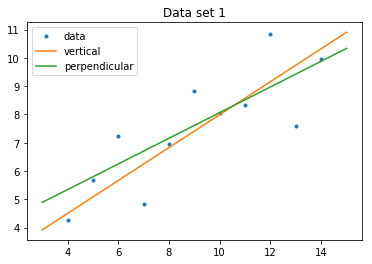

In [140]:
x_lin = np.linspace(3, 15, 101)
y_lin = lambda x, w: w[0]*x + w[1]
y_lin_perp = lambda x, w: - w[0]/w[1]*x - w[2]/w[1]

plt.plot(x1, y1, ".", label = "data")
plt.plot(x_lin, y_lin(x_lin, weights1_lsq), "-", label = "vertical")
plt.plot(x_lin, y_lin_perp(x_lin, weights1_perp_lsq), label = "perpendicular")
plt.legend()

plt.title("Data set 1")
plt.show()

Here I have plotted the first set of points from the Anscombes data set. The method with the vertical offsets converges to the visualy best slope, while the algorithm for the perpendicular method converges but not to the right values. I have this very same problem for all following graphs and I can not figure out the reason for this. It might be related to the constraint of normalizing the length of the parameter vector. Another observation I made is, that the final parameters for the perpendicular version heavily depend on the initial parameters. I tried both with backtracking and with a small constant value for $\alpha$.

### Data set 2

In [149]:
w = np.array([0,1]) #np.r_[np.random.uniform() ,np.random.uniform()]
w_perp = np.array([0,-0.4,0.3]) #np.r_[np.random.uniform() ,np.random.uniform(), np.random.uniform()]

x, y = data2[:,0], data2[:,1]
x2, y2 = x, y

print("\nVertical offsets for second data set:")
w2 = grad_descent(w, 1e-4, Q, grad_Q)
#w2 = grad_backtracking(w, Q, grad_Q)
weights2_lsq = w2[-1,:]
print("Weights for vertical offsets for second data set:", weights2_lsq)

print("\nPerpendicular offsets for second data set:")
w2_perp = grad_descent_perp(w_perp, 1e-4, Q_perp, grad_Q_perp)
#w2_perp = grad_backtracking_perp(w_perp, Q_perp, grad_Q_perp)
weights2_perp_lsq = w2_perp[-1,:]
print("Weights for vertical offsets for second data set:", weights2_perp_lsq)


Vertical offsets for second data set:
The algorithm has converged after 7048 iterations!!!
Weights for vertical offsets for second data set: [0.58229928 2.16976701]

Perpendicular offsets for second data set:
The algorithm has converged after 2260 iterations!!!
Weights for vertical offsets for second data set: [ 0.14663675 -0.29867117  0.94302343]


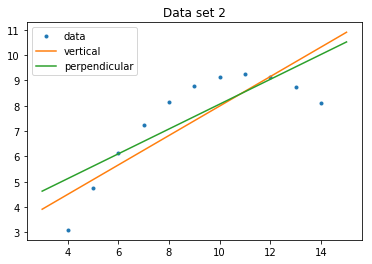

In [150]:
plt.plot(x2, y2, ".", label = "data")
plt.plot(x_lin, y_lin(x_lin, weights2_lsq), "-", label = "vertical")
plt.plot(x_lin, y_lin_perp(x_lin, weights2_perp_lsq), label = "perpendicular")
plt.legend()

plt.title("Data set 2")
plt.show()

For the second set of points both algorithms converge, but to a different slope. Assuming that the vertical method works well, the perpendicular method converges to a value with smaller slope than the vertical method. Here again the slope depends on the initial values of the parameters, which is an indicator that there are several minima the way the algorithm is programmed. I assume that this stems from the normalization of the parameter vector.

In any case, a linear slope is not the right approach for fitting the data points we have in this data set. A quadratic function here would do a much better job.

### Data set 3

In [152]:
w = np.array([0.5,2]) #np.r_[np.random.uniform() ,np.random.uniform()]
w_perp = np.array([0,-1,0.3]) #np.r_[np.random.uniform() ,np.random.uniform(), np.random.uniform()]

x, y = data3[:,0], data3[:,1]
x3, y3 = x, y

print("\nVertical offsets for third data set:")
w3 = grad_descent(w, 1e-4, Q, grad_Q, 5e4, 1e-6)
#w3 = grad_backtracking(w, Q, grad_Q)
weights3_lsq = w3[-1,:]
print("Weights for vertical offsets for third data set:", weights3_lsq)

print("\nPerpendicular offsets for third data set:")
w3_perp = grad_descent_perp(w_perp, 1e-4, Q_perp, grad_Q_perp, 5e4, 1e-8)
#w3_perp_lsq = grad_backtracking_perp(w_perp, Q_perp, grad_Q_perp)
weights3_perp_lsq = w3_perp[-1,:]
print("Weights for vertical offsets for third data set:", weights3_perp_lsq)


Vertical offsets for third data set:
The algorithm has converged after 20718 iterations!!!
Weights for vertical offsets for third data set: [0.50795742 2.91933812]

Perpendicular offsets for third data set:
The algorithm has converged after 12586 iterations!!!
Weights for vertical offsets for third data set: [ 0.24353271 -0.41049418  0.87874135]


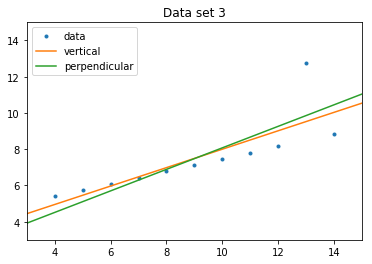

In [153]:
x_lin = np.linspace(-3, 15, 101)
x_low, x_high, y_low, y_high = 3, 15, 3, 15

plt.plot(x3, y3, ".", label = "data")
plt.plot(x_lin, y_lin(x_lin, weights3_lsq), "-", label = "vertical")
plt.plot(x_lin, y_lin_perp(x_lin, weights3_perp_lsq), label = "perpendicular")
plt.xlim(x_low, x_high)
plt.ylim(y_low, y_high)
plt.legend()

plt.title("Data set 3")
plt.show()

This third data set focusses on outliers. We have one point that clearly deviates from the straight line on which the other points lie. From the both fitted slopes we observe that the perpendicular method is more affected by the outlier. However, I would not expect such a strong effect because for both methods the vertical and the perpendicular offsets, the error goes into the error function with an exponent, so they should behave similarly for a data set whose angle between fitted line and x-axis is small.

### Data set 4

In [154]:
w = np.array([0,3]) 
w_perp = np.array([0,-0.5,0.3]) 

x, y = data4[:,0], data4[:,1]
x4, y4 = x, y

In [155]:
print("\nVertical offsets for fourth data set:")
w4 = grad_descent(w, 1e-4, Q, grad_Q, 1e5, 1e-6)
#w4 = grad_backtracking(w,Q, grad_Q)
weights4_lsq = w4[-1,:]
print("Weights for vertical offsets for fourth data set:", weights4_lsq)


Vertical offsets for fourth data set:
The algorithm has converged after 83 iterations!!!
Weights for vertical offsets for fourth data set: [0.49519944 3.04856207]


In [157]:
print("\nPerpendicular offsets for fourth data set:")
w4_perp = grad_descent_perp(w_perp, 1e-4, Q_perp, grad_Q_perp, 1e5, 1e-8)
#w4_perp = grad_backtracking_perp(w_perp, Q_perp, grad_Q_perp)
weights4_perp_lsq = w4_perp[-1,:]
print("Weights for vertical offsets for fourth data set:", weights4_perp_lsq)


Perpendicular offsets for fourth data set:
The algorithm has converged after 11573 iterations!!!
Weights for vertical offsets for fourth data set: [ 0.15412604 -0.30743691  0.93900357]


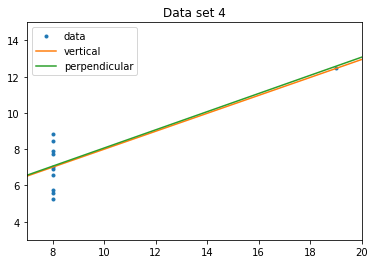

In [158]:
x_low, x_high = 7, 20
y_low, y_high = 3, 15
x_lin = np.linspace(7, 20, 131)

plt.plot(x4_lsq, y4_lsq, ".", label = "data")
plt.plot(x_lin, y_lin(x_lin, weights4_lsq), "-", label = "vertical")
plt.plot(x_lin, y_lin_perp(x_lin, weights4_perp_lsq), label = "perpendicular")
plt.xlim(x_low, x_high)
plt.ylim(y_low, y_high)
plt.legend()

plt.title("Data set 4")
plt.show()

The last data set requires choosing the threshold, (difference between current function value and next function value of loss function) for which the algorithm detects that the minimum is reached, very small. The algorithm optimizes the error to the points on the left very quickly, because in every iteration the error decreases. On the left we have only one point, so the error just decreases minimally when approaching this point, which is why the threshold needs to be chosen small. Both methods converge to a reasonable value.

## Robust functions

### Plot Cauchy vs Least Squares function

In [54]:
x0 = np.linspace(-1,1, 1001)
x0_ = np.linspace(-10,10,1001)

In [55]:
cauchy = lambda u: 1/2. * np.log(1 + u**2)
least_squares = lambda u: 0.5*u**2

y_cauchy1 = cauchy(x0)
y_lsq1 = least_squares(x0)
y_cauchy2 = cauchy(x0_)
y_lsq2 = least_squares(x0_)

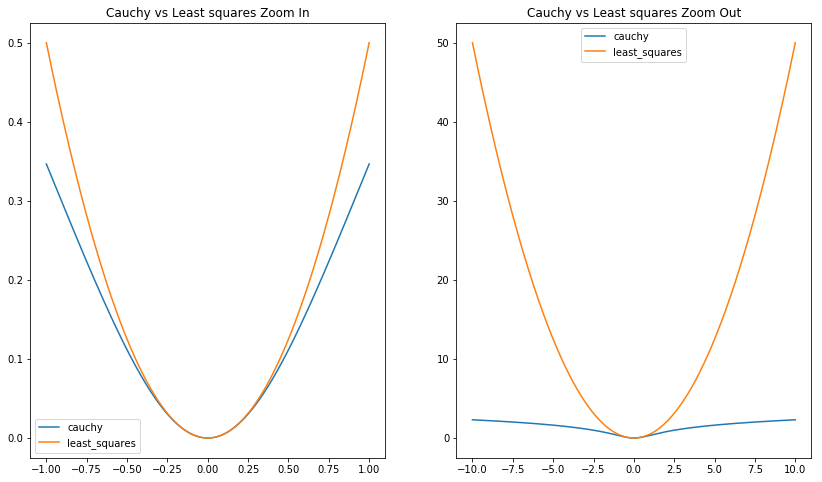

In [56]:
plt.figure(figsize = (14,8))
plt.subplot(1,2,1)
plt.plot(x0, y_cauchy1, label = "cauchy")
plt.plot(x0, y_lsq1, label = "least_squares")
plt.title("Cauchy vs Least squares Zoom In")
plt.legend()

plt.subplot(1,2,2)
plt.plot(x0_, y_cauchy2, label = "cauchy")
plt.plot(x0_, y_lsq2, label = "least_squares")
plt.title("Cauchy vs Least squares Zoom Out")
plt.legend()

plt.show()

In both graphs I am plotting the Cauchy function with $c = 1$ and the least squares error function for different x-ranges. I choose different ranges in order to compare both functions at their minimum, and far away from their minimum. In the left plot we inspect them at their minimum and observe that they are very similar once the error gets very small, while in the right plot we observe that they behave fundamentally different for large errors. The least squares function penalizes strongly large errors leading to high sensitivity to outliers, whereas the Cauchy function grows logarithmically with the error. This leads to a comparatively small penalization of large deviations, leading to small sensitivity to outliers.

### Data set 1 with Cauchy function

In this section we repeat the same analysis as in the section where we fitted the Anscombes data sets, but we include the Cauchy function as the loss function into the analysis.

In [163]:
w = np.array([0,2])
w_perp = np.array([0,-0.5,0.3])

x, y = data1[:,0], data1[:,1]

print("\nVertical offsets for first data set with the Cauchy function:")
w1_cauchy = grad_descent(w, 1e-4, Q_cauchy, grad_Q_cauchy)
#w1_cauchy = grad_backtracking(w, Q_cauchy, grad_Q_cauchy)
weights1_cauchy = w1_cauchy[-1,:]
print("Weights for vertical offsets for first data set:", weights1_cauchy)

print("\nPerpendicular offsets for first data set with the Cauchy function:")
w1_cauchy_perp = grad_descent_perp(w_perp, 1e-4, Q_cauchy_perp, grad_Q_cauchy_perp)
#w1_cauchy_perp = grad_backtracking_perp(w_perp, Q_cauchy_perp, grad_Q_cauchy_perp)
weights1_cauchy_perp = w1_cauchy_perp[-1,:]
print("Weights for vertical offsets for first data set with the Cauchy function:", weights1_cauchy_perp)


Vertical offsets for first data set with the Cauchy function:
The algorithm has converged after 297 iterations!!!
Weights for vertical offsets for first data set: [0.58886973 2.07213502]

Perpendicular offsets for first data set with the Cauchy function:
The algorithm has converged after 2811 iterations!!!
Weights for vertical offsets for first data set with the Cauchy function: [ 0.30136834 -0.47157111  0.82873266]


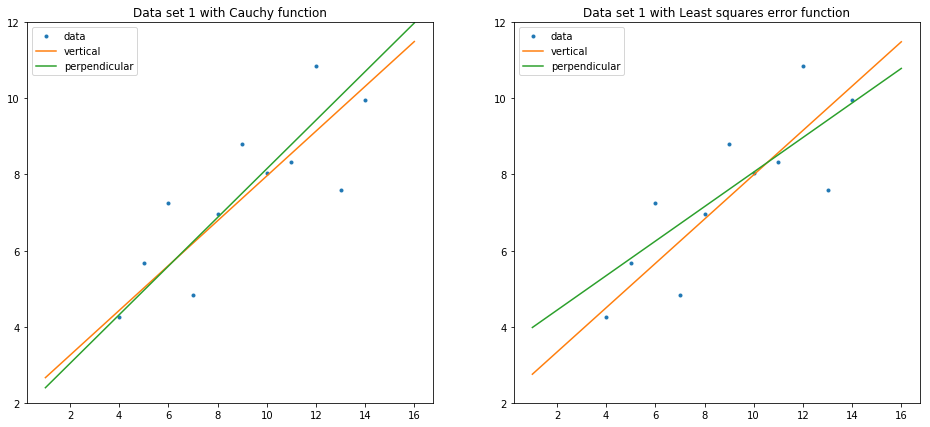

In [164]:
x_lin = np.linspace(1, 16, 101)

y_low, y_high = 2, 12

plt.figure(figsize = (16,7))

plt.subplot(1, 2, 1)
plt.plot(x1, y1, ".", label = "data")
plt.plot(x_lin, y_lin(x_lin, weights1_cauchy), "-", label = "vertical")
plt.plot(x_lin, y_lin_perp(x_lin, weights1_cauchy_perp), label = "perpendicular")
plt.ylim(y_low, y_high)
plt.legend()
plt.title("Data set 1 with Cauchy function")

plt.subplot(1, 2, 2)
plt.plot(x1, y1, ".", label = "data")
plt.plot(x_lin, y_lin(x_lin, weights1_lsq), "-", label = "vertical")
plt.plot(x_lin, y_lin_perp(x_lin, weights1_perp_lsq), label = "perpendicular")
plt.ylim(y_low, y_high)
plt.legend()
plt.title("Data set 1 with Least squares error function")

plt.show()

Choosing the Cauchy function as the loss function, we observe stronger agreement between vertical and perpendicular method. For this data set I can not asure that this behaviour is a consequence of the difference in loss functions or if it stems from an issue with the perpendicular method, since both loss functions give a similar result for the vertical method. The green line on the right is clearly not the best line considering perpendicular error minimization.

### Data set 2 with Cauchy function

In [177]:
w = np.array([0,1])
w_perp = np.array([0,0.1,-0.25])

x, y = data2[:,0], data2[:,1]

print("\nVertical offsets for second data set with Cauchy function:")
w2_cauchy = grad_descent(w, 1e-4, Q_cauchy, grad_Q_cauchy)
#w2_cauchy = grad_backtracking(w, Q_cauchy, grad_Q_cauchy)
weights2_cauchy = w2_cauchy[-1,:]
print("Weights for vertical offsets for second data set Cauchy function:", weights2_cauchy)

print("\nPerpendicular offsets for second data set with Cauchy function:")
w2_cauchy_perp = grad_descent_perp(w_perp, 1e-4, Q_cauchy_perp, grad_Q_cauchy_perp)
#w2_cauchy_perp = grad_backtracking_perp(w_perp, Q_cauchy_perp, grad_Q_cauchy_perp, tol_fct = 1e-6)
weights2_cauchy_perp = w2_cauchy_perp[-1,:]
print("Weights for vertical offsets for second data set with Cauchy function:", weights2_cauchy_perp)


Vertical offsets for second data set with Cauchy function:
The algorithm has converged after 485 iterations!!!
Weights for vertical offsets for second data set Cauchy function: [0.74773922 1.09741324]

Perpendicular offsets for second data set with Cauchy function:
The algorithm has converged after 661 iterations!!!
Weights for vertical offsets for second data set with Cauchy function: [-0.07873762  0.21734546 -0.97291384]


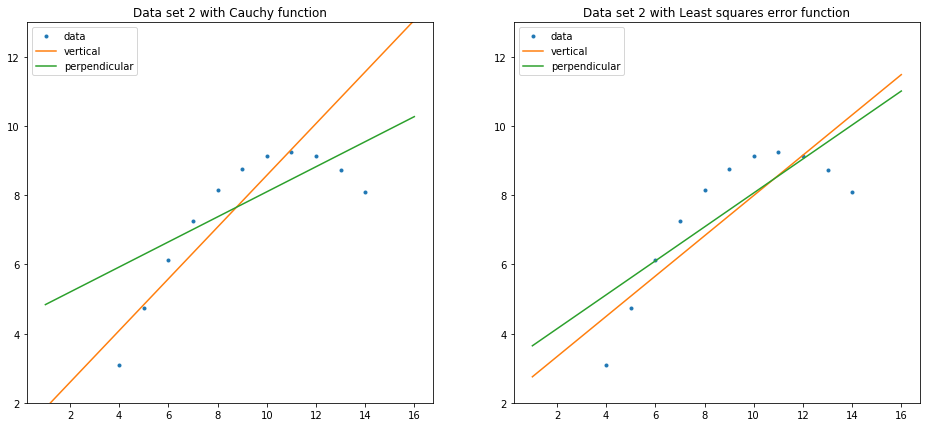

In [178]:
x_lin = np.linspace(1, 16, 101)

y_low, y_high = 2, 13

plt.figure(figsize = (16,7))

plt.subplot(1, 2, 1)
plt.plot(x2, y2, ".", label = "data")
plt.plot(x_lin, y_lin(x_lin, weights2_cauchy), "-", label = "vertical")
plt.plot(x_lin, y_lin_perp(x_lin, weights2_cauchy_perp), label = "perpendicular")
plt.ylim(y_low, y_high)
plt.legend()
plt.title("Data set 2 with Cauchy function")

plt.subplot(1, 2, 2)
plt.plot(x2, y2, ".", label = "data")
plt.plot(x_lin, y_lin(x_lin, weights2_lsq), "-", label = "vertical")
plt.plot(x_lin, y_lin_perp(x_lin, weights2_perp_lsq), label = "perpendicular")
plt.ylim(y_low, y_high)
plt.legend()
plt.title("Data set 2 with Least squares error function")

plt.show()

Here again the vertical methods have similar behaviour for both the least squares loss function and the perpendicular loss function, whereas in the left plot the algorithm wants to have many points as close as possible to the line while it doesn't penalize points that are far way as strongly as in the right plot. Therefore the slightly increase slope for the Cauchy loss function.

As it is shown in the left plot, the slope of the perpendicular method is much smaller than the slope of the vertical method. The slope of the perpendicular method, however, depends heavily on the initial parameters. Choosing the parameters different I obtain a much smaller slope. In all the cases, the algorithm reaches the convergence criteria. This behaviour is probably a consequence of the normalization contraints, since there are probably several minimal points with $w_0^2 + w_1^2 + b^2 = 1$.

### Data set 3 with Cauchy function

In [203]:
w = np.array([0,1])
w_perp = np.array([0,0.3,-0.3])

x, y = data3[:,0], data3[:,1]

print("\nVertical offsets for third data set with Cauchy function:")
#w3_cauchy = grad_descent(w, 1e-4, Q_cauchy, grad_Q_cauchy)
w3_cauchy = grad_backtracking(w, Q_cauchy, grad_Q_cauchy, 1e5, 1e-6)
weights3_cauchy = w3_cauchy[-1,:]
#print("Weights for vertical offsets for third data set Cauchy function:", weights3_cauchy)

print("\nPerpendicular offsets for third data set with Cauchy function:")
#w3_cauchy_perp = grad_descent_perp(w_perp, 1e-3, Q_cauchy_perp, grad_Q_cauchy_perp)
w3_cauchy_perp = grad_backtracking_perp(w_perp,Q_cauchy_perp, grad_Q_cauchy_perp, 1e5, 1e-6)
weights3_cauchy_perp = w3_cauchy_perp[-1,:]
print("Weights for vertical offsets for third data set with Cauchy function:", weights3_cauchy_perp)


Vertical offsets for third data set with Cauchy function:
The algorithm has converged at [0.38363016 3.66502745] after 582 iterations!

Perpendicular offsets for third data set with Cauchy function:
The algorithm has converged at [-0.03559568  0.1732026  -0.98424276] after 189 iterations!
Weights for vertical offsets for third data set with Cauchy function: [-0.03537733  0.17214012 -0.9782051 ]


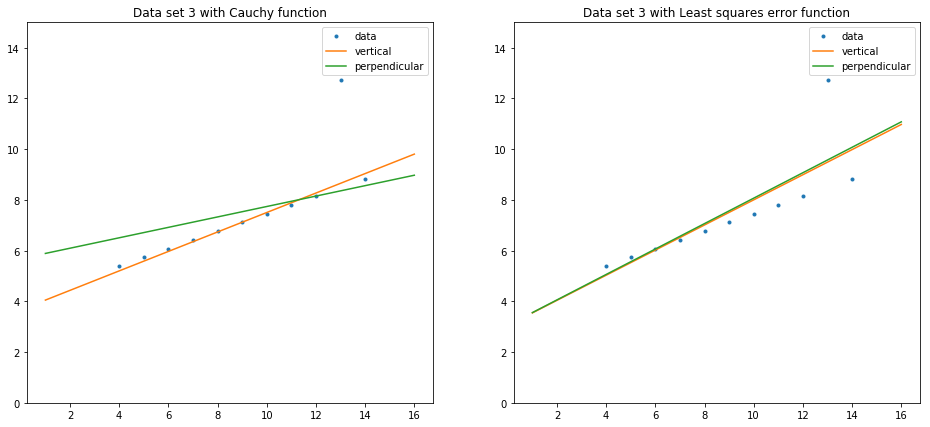

In [204]:
x_lin = np.linspace(1, 16, 101)

y_low, y_high = 0, 15

plt.figure(figsize = (16,7))

plt.subplot(1, 2, 1)
plt.plot(x3, y3, ".", label = "data")
plt.plot(x_lin, y_lin(x_lin, weights3_cauchy), "-", label = "vertical")
plt.plot(x_lin, y_lin_perp(x_lin, weights3_cauchy_perp), label = "perpendicular")
plt.ylim(y_low, y_high)
plt.legend()
plt.title("Data set 3 with Cauchy function")

plt.subplot(1, 2, 2)
plt.plot(x3, y3, ".", label = "data")
plt.plot(x_lin, y_lin(x_lin, weights4_lsq), "-", label = "vertical")
plt.plot(x_lin, y_lin_perp(x_lin, weights4_perp_lsq), label = "perpendicular")
plt.ylim(y_low, y_high)
plt.legend()
plt.title("Data set 3 with Least squares error function")

plt.show()

Comparing the vertical method for the Cauchy loss function with the least squares loss function, we observe the expected, namely that the slope plotted with the Cauchy loss function is robust against the outlier. It fits very well the points that are on one line and almost ignores the outlier.

For the perpendicular method there is clearly something wrong, but I can't figure out whats going on. 

### Data set 4 with Cauchy function

In [209]:
w = np.array([0.3,2])
w_perp = np.array([0, -0.5, 0.3])

x, y = data4[:,0], data4[:,1]

print("\nVertical offsets for fourth data set with Cauchy function:")
#w4_cauchy = grad_descent(w, 1e-4, Q_cauchy, grad_Q_cauchy, 1e5, 1e-6)
w4_cauchy = grad_backtracking(w, Q_cauchy, grad_Q_cauchy, 1e5, 1e-6)
weights4_cauchy = w4_cauchy[-1,:]
#print("Weights for vertical offsets for fourth data set Cauchy function:", weights4_cauchy)

print("\nPerpendicular offsets for fourth data set with Cauchy function:")
#w4_cauchy_perp = grad_descent_perp(w_perp, 1e-4, Q_cauchy_perp, grad_Q_cauchy_perp)
w4_cauchy_perp = grad_backtracking_perp(w_perp, Q_cauchy_perp, grad_Q_cauchy_perp, 1e5, 1e-6)
weights4_cauchy_perp = w4_cauchy_perp[-1,:]
#print("Weights for vertical offsets for fourth data set with Cauchy function:", weights4_cauchy_perp)


Vertical offsets for fourth data set with Cauchy function:
The algorithm has converged at [0.52439992 2.6853344 ] after 355 iterations!

Perpendicular offsets for fourth data set with Cauchy function:
The algorithm has converged at [ 0.01297657 -0.1402612   0.9900295 ] after 1028 iterations!


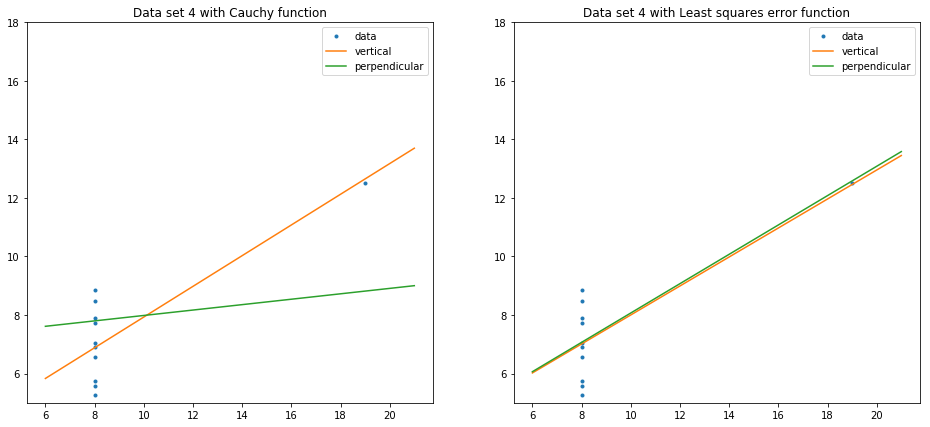

In [210]:
x_lin = np.linspace(6, 21, 101)
y_low, y_high = 5, 18

plt.figure(figsize = (16,7))

plt.subplot(1, 2, 1)
plt.plot(x4, y4, ".", label = "data")
plt.plot(x_lin, y_lin(x_lin, weights4_cauchy), "-", label = "vertical")
plt.plot(x_lin, y_lin_perp(x_lin, weights4_cauchy_perp), label = "perpendicular")
plt.ylim(y_low, y_high)
plt.legend()
plt.title("Data set 4 with Cauchy function")

plt.subplot(1, 2, 2)
plt.plot(x4, y4, ".", label = "data")
plt.plot(x_lin, y_lin(x_lin, weights4_lsq), "-", label = "vertical")
plt.plot(x_lin, y_lin_perp(x_lin, weights4_perp_lsq), label = "perpendicular")
plt.ylim(y_low, y_high)
plt.legend()
plt.title("Data set 4 with Least squares error function")

plt.show()

Here the vertical methods yield a similar result, between both type of loss functions, and again there is some weird behaviour for the perpendicular method involving the Cauchy loss function.